In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [16]:
# Load data
customers = pd.read_csv('../data/customers.csv')
products = pd.read_csv('../data/products.csv')
transactions = pd.read_csv('../data/transactions.csv')

In [17]:
print("=== DATASET OVERVIEW ===")
print(f"📊 Customers: {len(customers):,}")
print(f"📦 Products: {len(products):,}")
print(f"💰 Transactions: {len(transactions):,}")
print(f"💵 Total Revenue: ${transactions['total_amount'].sum():,.2f}")
print(f"📅 Date Range: {transactions['transaction_date'].min()} to {transactions['transaction_date'].max()}")


=== DATASET OVERVIEW ===
📊 Customers: 2,000
📦 Products: 200
💰 Transactions: 10,000
💵 Total Revenue: $4,518,754.39
📅 Date Range: 2024-11-10 07:45:22.441041 to 2025-07-12 10:43:50.132163


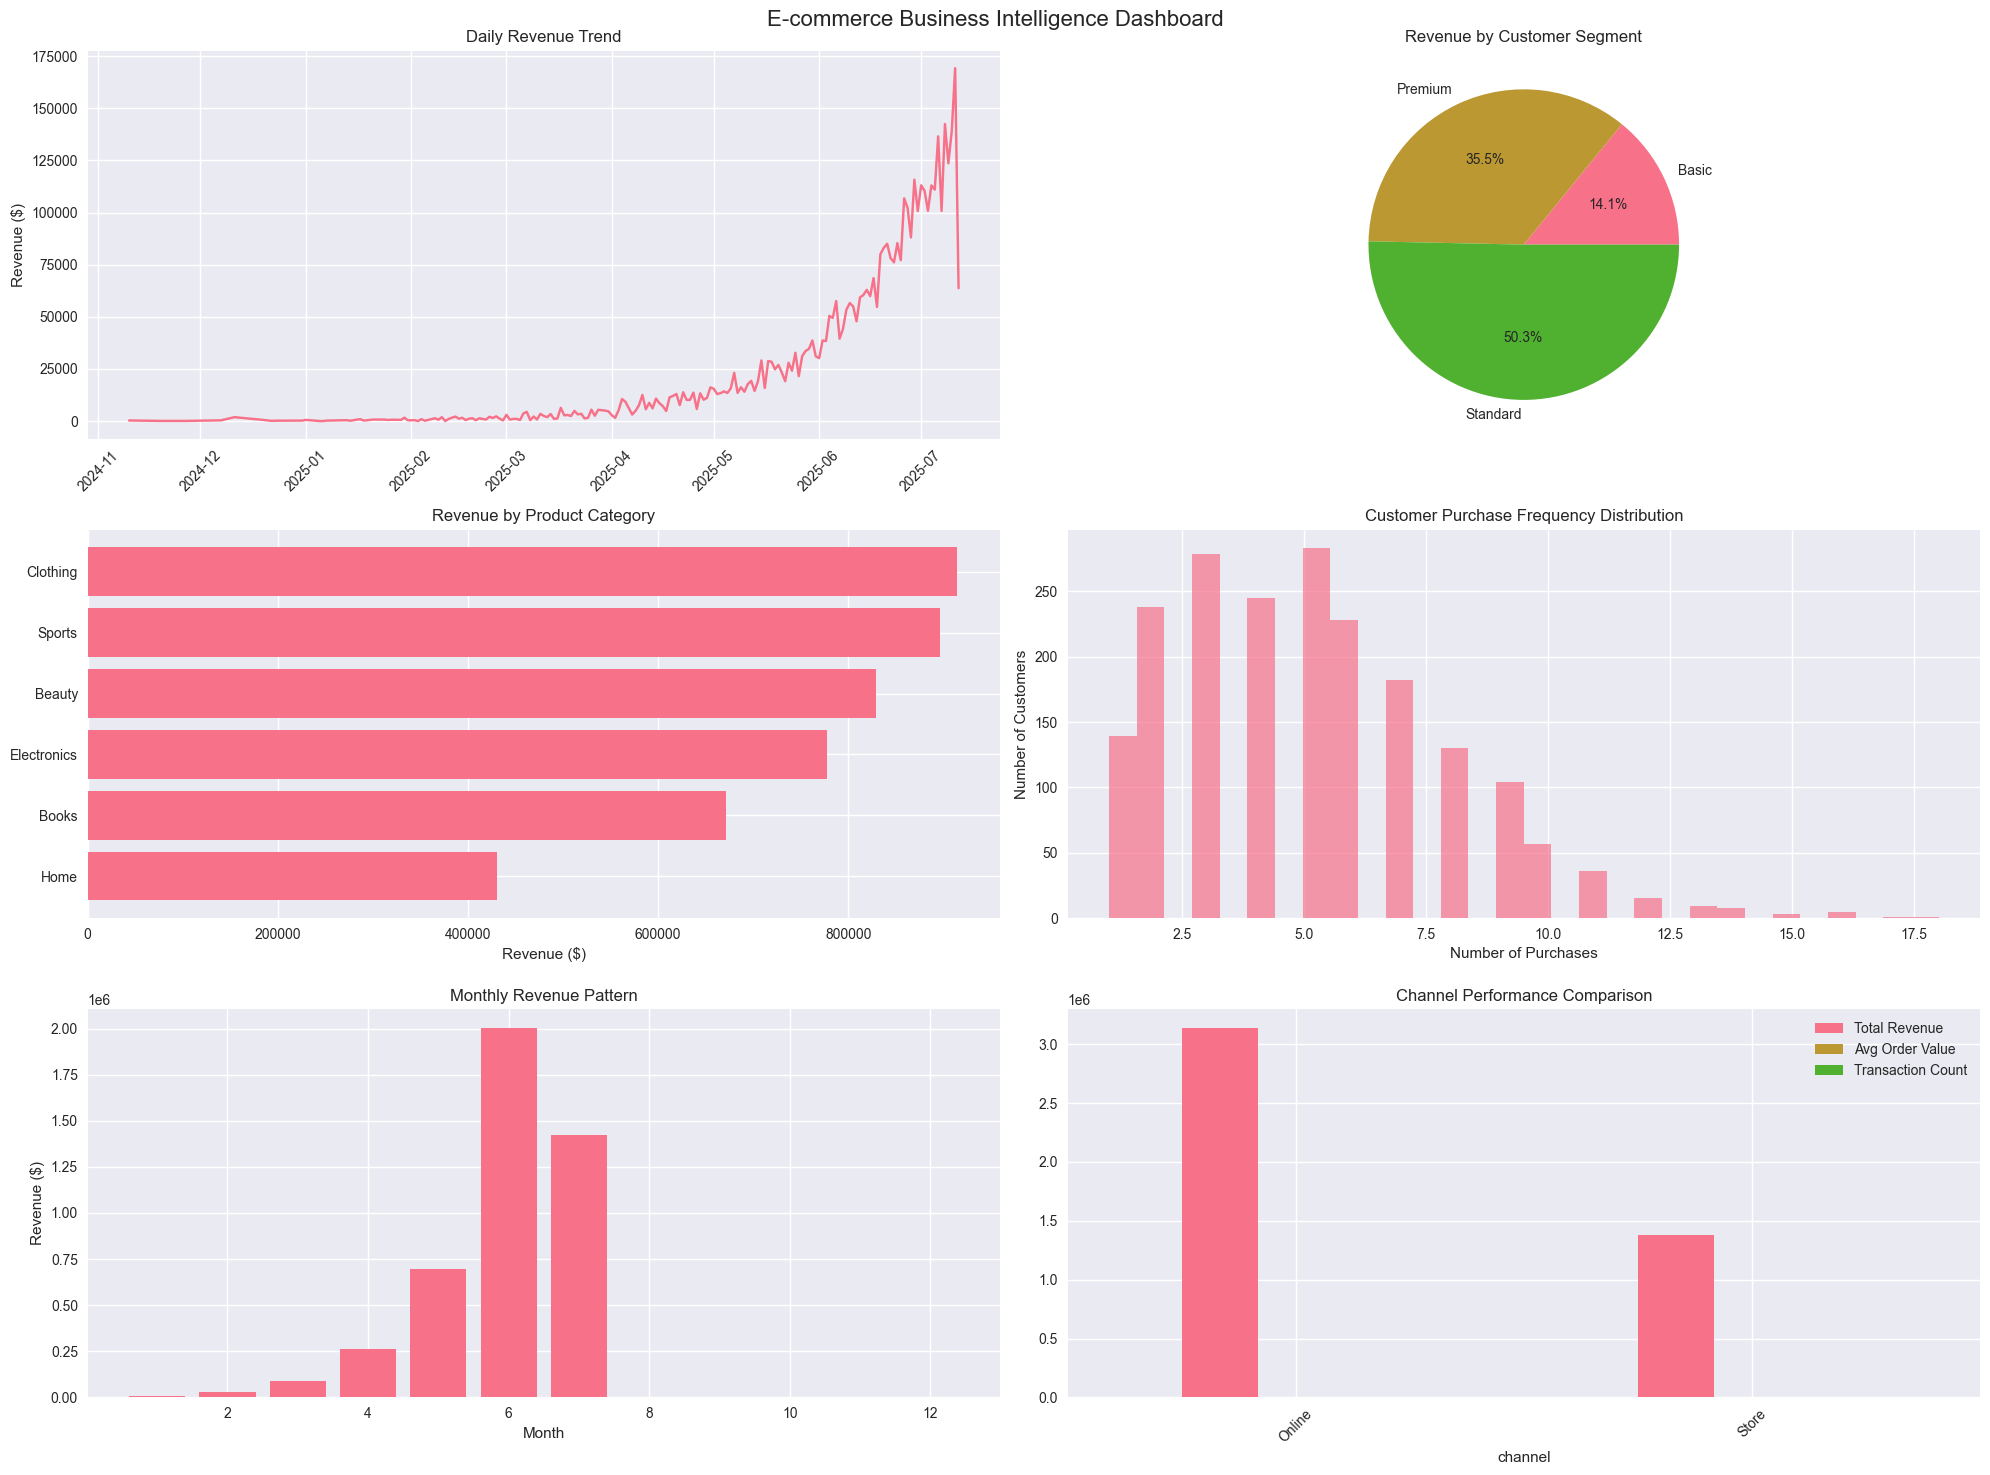

In [19]:
# Create comprehensive analysis dashboard
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('E-commerce Business Intelligence Dashboard', fontsize=16, y=0.98)

# 1. Revenue trend over time
transactions['date'] = pd.to_datetime(transactions['transaction_date']).dt.date
daily_revenue = transactions.groupby('date')['total_amount'].sum().reset_index()
axes[0, 0].plot(daily_revenue['date'], daily_revenue['total_amount'])
axes[0, 0].set_title('Daily Revenue Trend')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Revenue ($)')

# 2. Customer segment distribution
segment_revenue = transactions.merge(customers, on='customer_id').groupby('customer_segment')['total_amount'].sum()
axes[0, 1].pie(segment_revenue.values, labels=segment_revenue.index, autopct='%1.1f%%')
axes[0, 1].set_title('Revenue by Customer Segment')

# 3. Product category performance
category_data = transactions.merge(products, on='product_id')
category_revenue = category_data.groupby('category')['total_amount'].sum().sort_values(ascending=True)
axes[1, 0].barh(category_revenue.index, category_revenue.values)
axes[1, 0].set_title('Revenue by Product Category')
axes[1, 0].set_xlabel('Revenue ($)')

# 4. Customer purchase frequency
customer_frequency = transactions.groupby('customer_id').size()
axes[1, 1].hist(customer_frequency.values, bins=30, alpha=0.7)
axes[1, 1].set_title('Customer Purchase Frequency Distribution')
axes[1, 1].set_xlabel('Number of Purchases')
axes[1, 1].set_ylabel('Number of Customers')

# 5. Monthly revenue pattern
transactions['month'] = pd.to_datetime(transactions['transaction_date']).dt.month
monthly_revenue = transactions.groupby('month')['total_amount'].sum()
axes[2, 0].bar(monthly_revenue.index, monthly_revenue.values)
axes[2, 0].set_title('Monthly Revenue Pattern')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Revenue ($)')

# 6. Channel performance
channel_metrics = transactions.groupby('channel').agg({
    'total_amount': ['sum', 'mean', 'count']
}).round(2)
channel_metrics.columns = ['Total Revenue', 'Avg Order Value', 'Transaction Count']
channel_metrics.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Channel Performance Comparison')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/initial_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Generate business insights
print("\n=== KEY BUSINESS INSIGHTS ===")
print(f"🏆 Top Customer Segment: {segment_revenue.idxmax()} (${segment_revenue.max():,.2f})")
print(f"📦 Best Category: {category_revenue.idxmax()} (${category_revenue.max():,.2f})")
print(f"💰 Average Order Value: ${transactions['total_amount'].mean():.2f}")
print(f"🛒 Average Items per Order: {transactions['quantity'].mean():.1f}")
print(f"🔄 Customer Repeat Rate: {(customer_frequency > 1).sum() / len(customer_frequency) * 100:.1f}%")


=== KEY BUSINESS INSIGHTS ===
🏆 Top Customer Segment: Standard ($2,274,700.17)
📦 Best Category: Clothing ($913,823.32)
💰 Average Order Value: $451.88
🛒 Average Items per Order: 1.9
🔄 Customer Repeat Rate: 92.9%
